<a href="https://colab.research.google.com/github/pattichis/AI4All-Med/blob/main/Session_3_1_tensors_and_convolution_simplified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolution Using Tensors

Goals:

1. Introduce tensors.
2. Introduce convolution using tensors.

# Import the libraries

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import matplotlib.patches as patches

# Tensors

## Create a tensor

1. Study the outputs.
2. Comment on the values and dimensions.
3. What is "Predictably random" here?

In [2]:
print("Standard methods:")
print(" zeros  = \n", torch.zeros(2, 3))
print(" ones   = \n", torch.ones(2, 3))
print(" empty  = \n", torch.empty(2, 3))
print(" ")

print("Random methods:")
print(" random1 = \n", torch.randn(2, 3)) # mean=0, std dev=1
print(" random2 = \n", torch.randn(2, 3))
print(" ")

print("Predictably random methods:")
torch.manual_seed(1729)
print(" random1 = \n", torch.randn(2, 3)) # mean=0, std dev=1
torch.manual_seed(1729)
print(" random2 = \n", torch.randn(2, 3))

Standard methods:
 zeros  = 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
 ones   = 
 tensor([[1., 1., 1.],
        [1., 1., 1.]])
 empty  = 
 tensor([[8.7347e-28, 0.0000e+00, 1.1897e-42],
        [0.0000e+00, 1.6165e-34, 4.3229e-41]])
 
Random methods:
 random1 = 
 tensor([[-0.1472,  0.1363,  0.8978],
        [ 0.5494, -0.0255,  1.5798]])
 random2 = 
 tensor([[ 0.0561,  0.8867,  1.1175],
        [-0.0222, -0.9465, -2.3550]])
 
Predictably random methods:
 random1 = 
 tensor([[-1.1257, -0.0057, -1.3975],
        [ 1.4364, -0.1068, -0.8413]])
 random2 = 
 tensor([[-1.1257, -0.0057, -1.3975],
        [ 1.4364, -0.1068, -0.8413]])


# Convolution

## Small convolution example

Study the code and plots and then:
1. Change the image input. You can make it as large as you want.
2. Change conv3 to be all 1. This is an average filter.
3. Chanve conv4 to whatever you like.

After you finish your changes, run the code and take a look at the outputs.

In [3]:
# Define image to process.
# Image input (1x1x5x5 image)
input = torch.tensor([[[[0, 0, 0, 0, 0],
                        [0, 1, 1, 1, 1],
                        [0, 1, 1, 1, 1],
                        [0, 1, 1, 1, 1],
                        [0, 1, 1, 1, 1]]]], dtype=torch.float32)

# Define convolution layer with 1 output channel and 3x3 kernel
conv1 = nn.Conv2d(1, 1, 3, padding=0, bias=False)
conv2 = nn.Conv2d(1, 1, 3, padding=0, bias=False)
conv3 = nn.Conv2d(1, 1, 3, padding=0, bias=False)
conv4 = nn.Conv2d(1, 1, 3, padding=0, bias=False)

# Set weights for edge detection from left to right:
conv1.weight.data = torch.tensor([[[[-1, 0, 1],
                                    [-1, 0, 1],
                                    [-1, 0, 1]]]], dtype=torch.float32)

# Set weights for edge detection from top to bottom:
conv2.weight.data = torch.tensor([[[[-1,  -1, -1],
                                    [ 0,   0,  0],
                                    [ 1,   1,  1]]]], dtype=torch.float32)

# Create a mask of all 1s here.
conv3.weight.data = torch.tensor([[[[1,  1, 1],
                                    [ 1,   1,  1],
                                    [ 1,   1,  1]]]], dtype=torch.float32)

# Create whatever you like here!
conv4.weight.data = torch.tensor([[[[-1,  -1, -1],
                                    [ 0,   0,  0],
                                    [ 1,   1,  1]]]], dtype=torch.float32)

## Apply convolutions

In [4]:
out1 = conv1(input)
out2 = conv2(input)
out3 = conv3(input)
out4 = conv4(input)

## Convolution Animation

1. Discuss how the output reflects the convolution kernel.

You can animate any one of the convolutions by changing:
1. kernel_image
2. output_image


In [5]:
# Extract 2D arrays for display
input_image2 = input[0, 0].detach().numpy()
kernel_image = conv1.weight[0, 0].detach().numpy()
output_image = out1[0, 0].detach().numpy()

# Pretty-print with fixed precision and alignment
with np.printoptions(precision=2, suppress=True):
    print("input image  = \n", input_image2)
    print("output image = \n", output_image)
    print("convolution kernel = \n", kernel_image)


input image  = 
 [[0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]]
output image = 
 [[2. 0. 0.]
 [3. 0. 0.]
 [3. 0. 0.]]
convolution kernel = 
 [[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]


In [6]:
# NOTE: To save in GitHub, CLEAR THE OUTPUT

# Define interactive plot function
def show_step(step):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(input_image2, cmap='gray')
    ax.set_xticks(range(5))
    ax.set_yticks(range(5))
    ax.set_title(f"Step {step+1}")

    # Compute kernel position
    row = step // 3
    col = step % 3

    # Draw kernel window
    rect = patches.Rectangle((col - 0.5, row - 0.5), 3, 3,
                             linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    # Extract the subregion
    region = input_image2[row:row+3, col:col+3]
    result = np.sum(region * kernel_image)

    # Overlay values
    for i in range(3):
        for j in range(3):
            ax.text(col + j, row + i,
                    str(int(region[i, j])),
                    color='blue', ha='center', va='center')

    # Show output value
    ax.text(0, 5.5, f"Output[{row}, {col}] = {result:.1f}",
            fontsize=14, color='green')
    plt.show()


# Create slider and display
slider = widgets.IntSlider(value=0, min=0, max=8, step=1, description='Step:')
widgets.interact(show_step, step=slider)


interactive(children=(IntSlider(value=0, description='Step:', max=8), Output()), _dom_classes=('widget-interac…

<function __main__.show_step(step)>

## How convolution is applied

Study the example for the [0, 0] pixel.<br>
Verify the outputs for:
1. Output[0, 1].
2. Output[2, 2].
3. Output[2, 0]

The first pixel is calculated using:
$$
\text{Input patch} =
\begin{bmatrix}
0 & 0 & 0 \\
0 & 1 & 1 \\
0 & 1 & 1 \\
\end{bmatrix}
\quad
\text{Kernel} =
\begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1 \\
\end{bmatrix}
$$
Multiply corresponding pixels:
$$
\begin{aligned}
\text{Output}[0,0] &=
         (0 \times -1) + (0 \times 0) + (0 \times 1) \\
&\quad + (0 \times -1) + (1 \times 0) + (1 \times 1) \\
&\quad + (0 \times -1) + (1 \times 0) + (1 \times 1) \\
&= 1 + 1  \\
&= 2
\end{aligned}
$$


## Plot the results

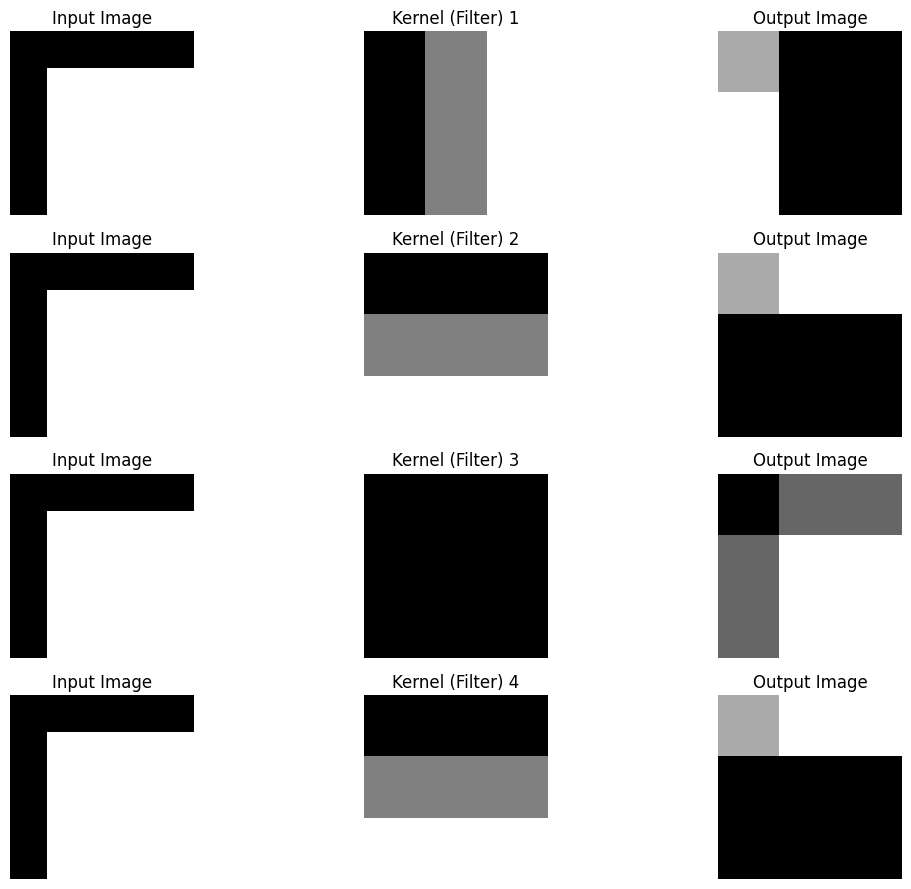

In [7]:
# Plots
plt.figure(figsize=(12, 9))

# conv1
plt.subplot(4, 3, 1)
plt.title("Input Image")
plt.imshow(input_image2, cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 2)
plt.title("Kernel (Filter) 1")
plt.imshow(conv1.weight[0, 0].detach().numpy(), cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 3)
plt.title("Output Image")
plt.imshow(out1[0, 0].detach().numpy(), cmap='gray')
plt.axis('off')


# conv2
plt.subplot(4, 3, 4)
plt.title("Input Image")
plt.imshow(input_image2, cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 5)
plt.title("Kernel (Filter) 2")
plt.imshow(conv2.weight[0, 0].detach().numpy(), cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 6)
plt.title("Output Image")
plt.imshow(out2[0, 0].detach().numpy(), cmap='gray')
plt.axis('off')


# conv3
plt.subplot(4, 3, 7)
plt.title("Input Image")
plt.imshow(input_image2, cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 8)
plt.title("Kernel (Filter) 3")
plt.imshow(conv3.weight[0, 0].detach().numpy(), cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 9)
plt.title("Output Image")
plt.imshow(out3[0, 0].detach().numpy(), cmap='gray')
plt.axis('off')


# conv4
plt.subplot(4, 3, 10)
plt.title("Input Image")
plt.imshow(input_image2, cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 11)
plt.title("Kernel (Filter) 4")
plt.imshow(conv4.weight[0, 0].detach().numpy(), cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 12)
plt.title("Output Image")
plt.imshow(out4[0, 0].detach().numpy(), cmap='gray')
plt.axis('off')


plt.tight_layout()
plt.show()



## Perform convolution on real images

## Load the images to visualize

1. Use the up arrow to upload your own image.
2. Change the filename to the image that you uploaded.


In [8]:
!wget -nc https://raw.githubusercontent.com/pattichis/GraphSpeeds2/main/Elephant.png
!wget -nc https://raw.githubusercontent.com/pattichis/GraphSpeeds2/main/Squirrel.png
!wget -nc https://raw.githubusercontent.com/pattichis/GraphSpeeds2/main/Tortoise.jpg
!wget -nc https://raw.githubusercontent.com/pattichis/GraphSpeeds2/main/Koala.jpeg

--2025-12-10 14:30:52--  https://raw.githubusercontent.com/pattichis/GraphSpeeds2/main/Elephant.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 332356 (325K) [image/png]
Saving to: ‘Elephant.png’

Elephant.png        100%[===================>] 324.57K  --.-KB/s    in 0.04s   

2025-12-10 14:30:52 (8.63 MB/s) - ‘Elephant.png’ saved [332356/332356]

--2025-12-10 14:30:52--  https://raw.githubusercontent.com/pattichis/GraphSpeeds2/main/Squirrel.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-12-10 14:30:52 ERROR 404: Not 

## Select image to process

Change the input image.


(1480, 1480, 3)


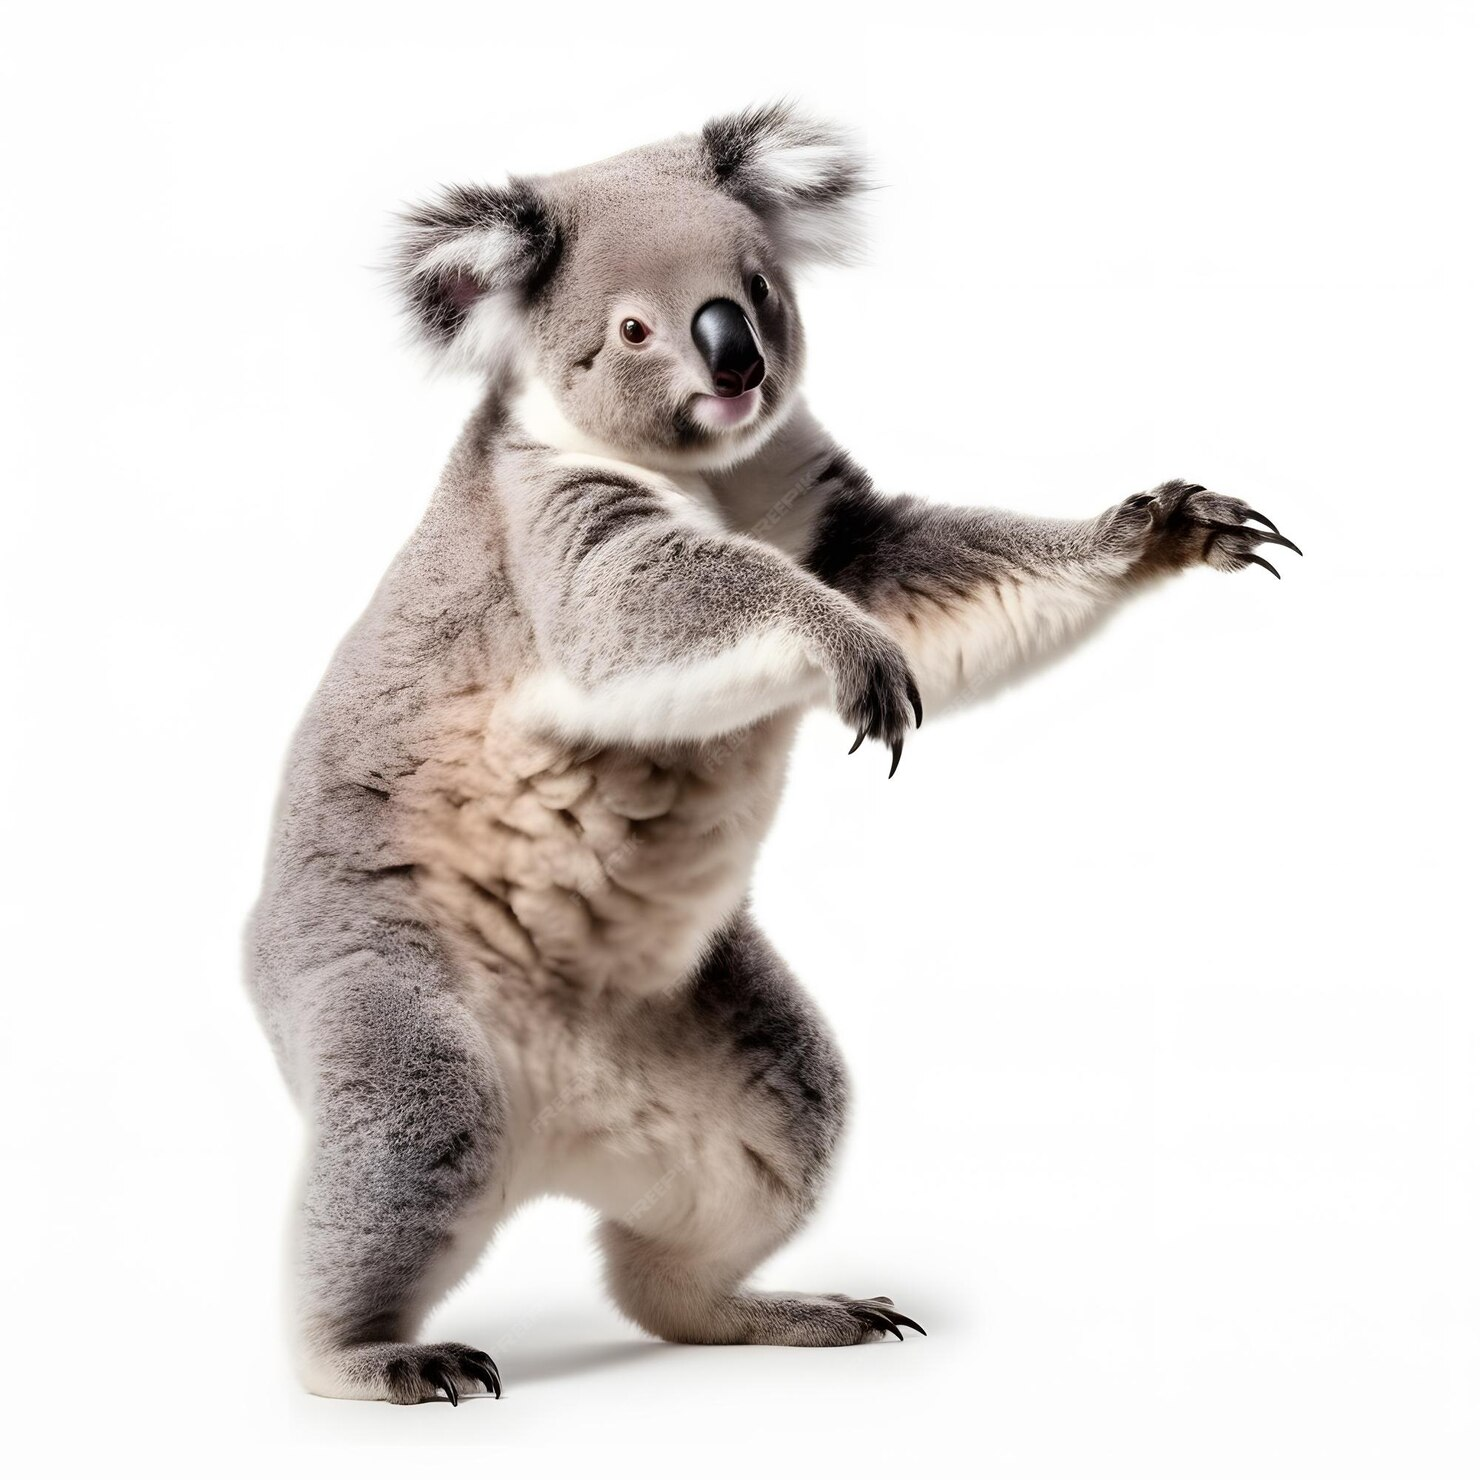

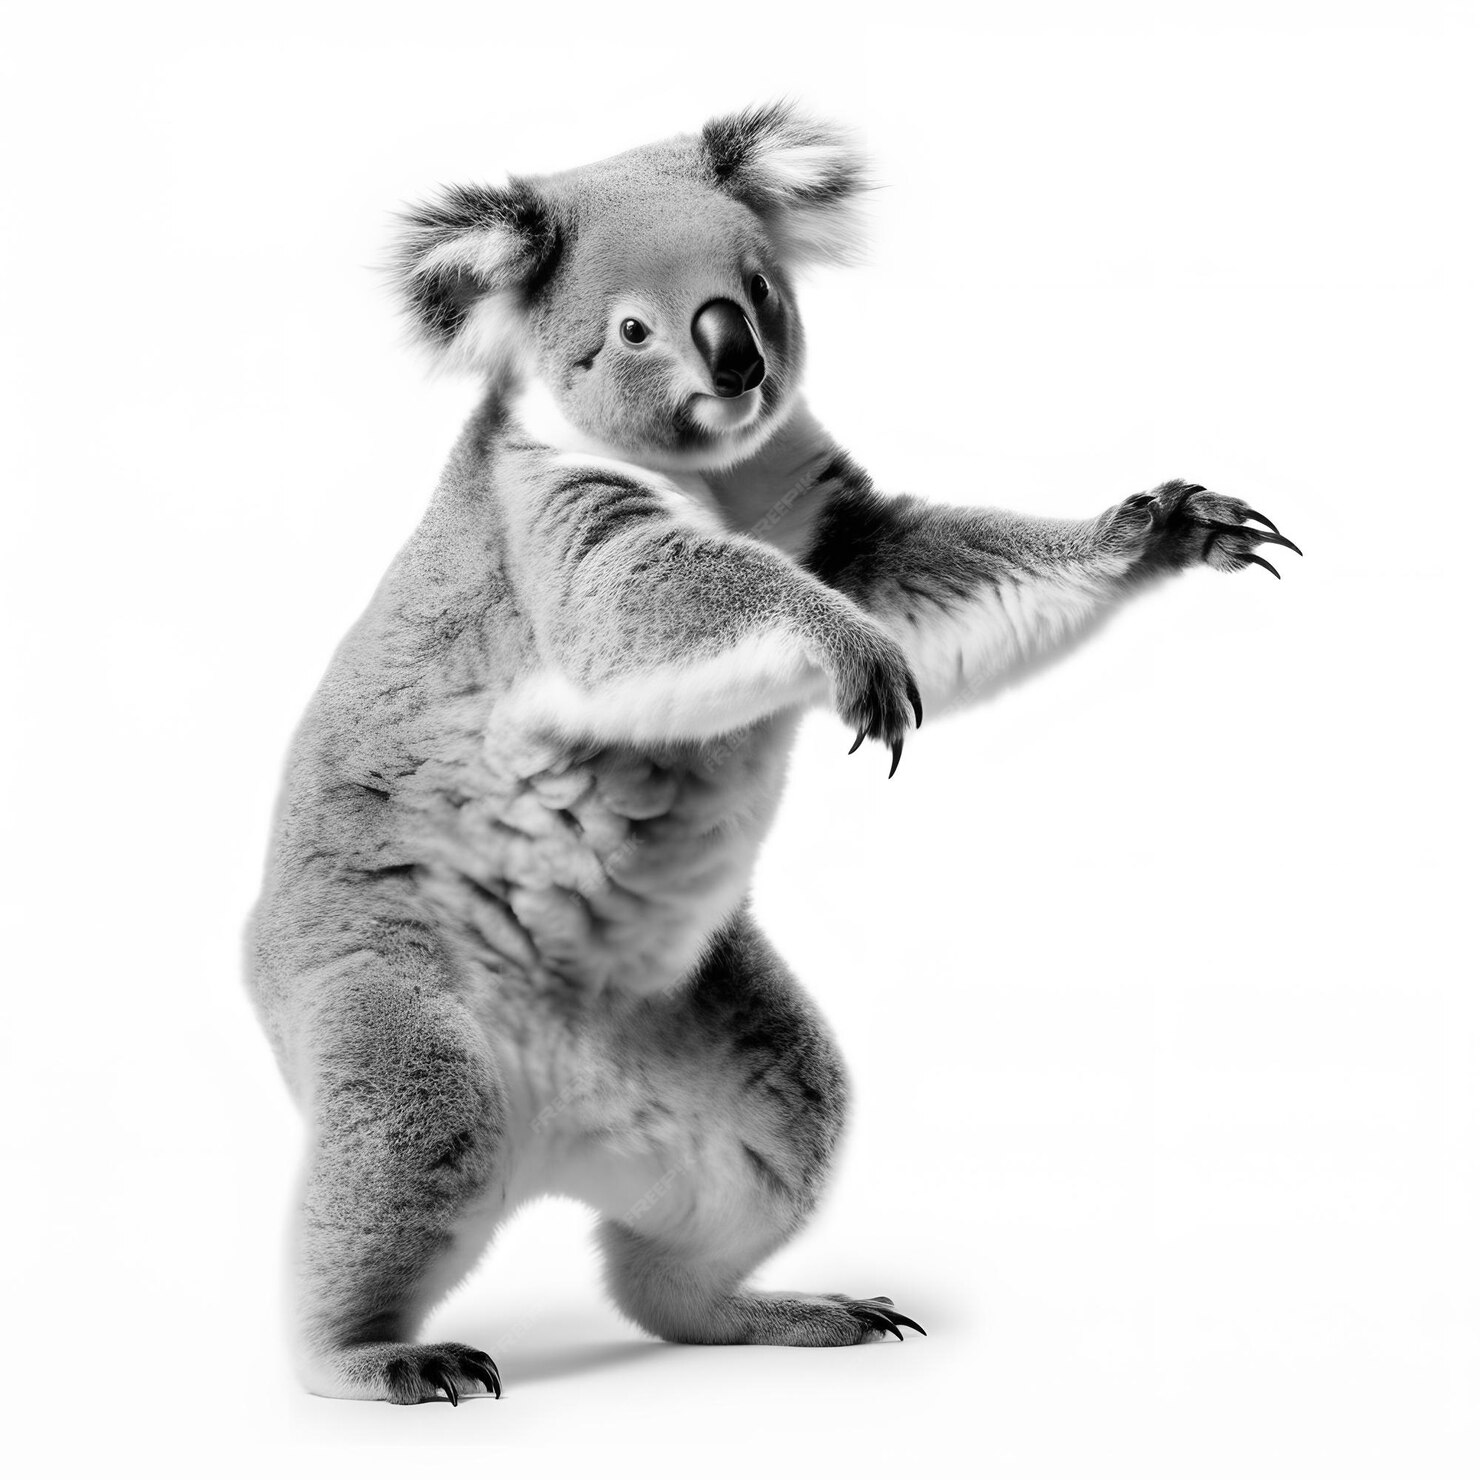

In [9]:
import cv2
from google.colab.patches import cv2_imshow  # use cv2_imshow in Colab
import numpy as np


# Select from Elephant.png, Squirrel.png, Tortoise.jpg, Koala.jpeg

filename="Koala.jpeg"
image = cv2.imread(filename)
print(image.shape)
cv2_imshow(image)

img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)



# Convert the input image to grayscale

You should not need to change this step.

In [10]:
grayscale_img_array = np.array(img)

# Convert to torch tensor and add batch and channel dimensions
input_image_tensor = torch.tensor(grayscale_img_array, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

## Select which filter you want to apply:

You can change this to conv1, conv2, conv3, conv4, ...

In [11]:
# Apply the convolution
output_image_tensor = conv1(input_image_tensor)

## Setup the output image for display

In [12]:
# Convert output to numpy array for display
output_image_array = output_image_tensor[0, 0].detach().numpy()
output_image_array = -np.abs(output_image_array)
#output_image_array = (output_image_array - output_image_array.min()) / (output_image_array.max() - output_image_array.min()) * 255

## Plot the input and output images

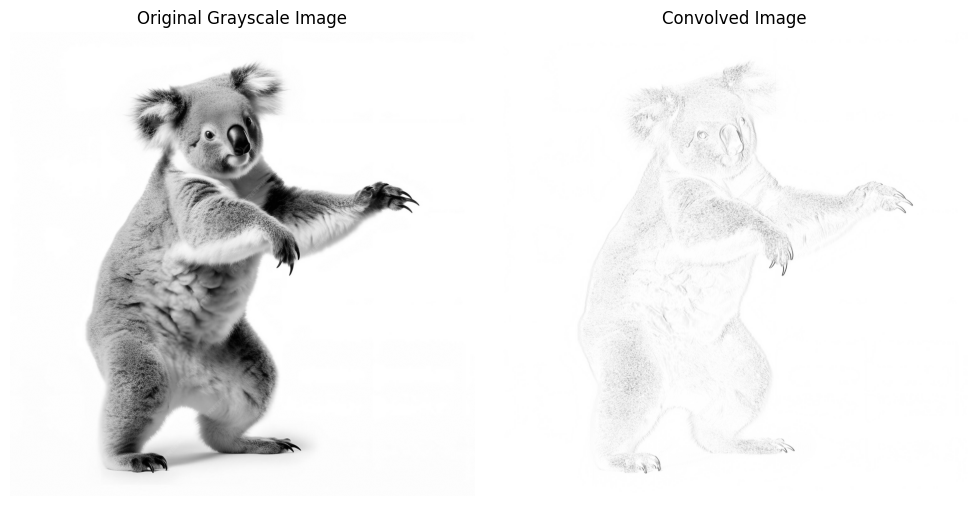

In [13]:
# Display the original and convolved images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(grayscale_img_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Convolved Image")
plt.imshow(output_image_array, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
input_image = img

out1 = conv1(input_image_tensor)
out2 = conv2(input_image_tensor)
out3 = conv3(input_image_tensor)
out4 = conv4(input_image_tensor)

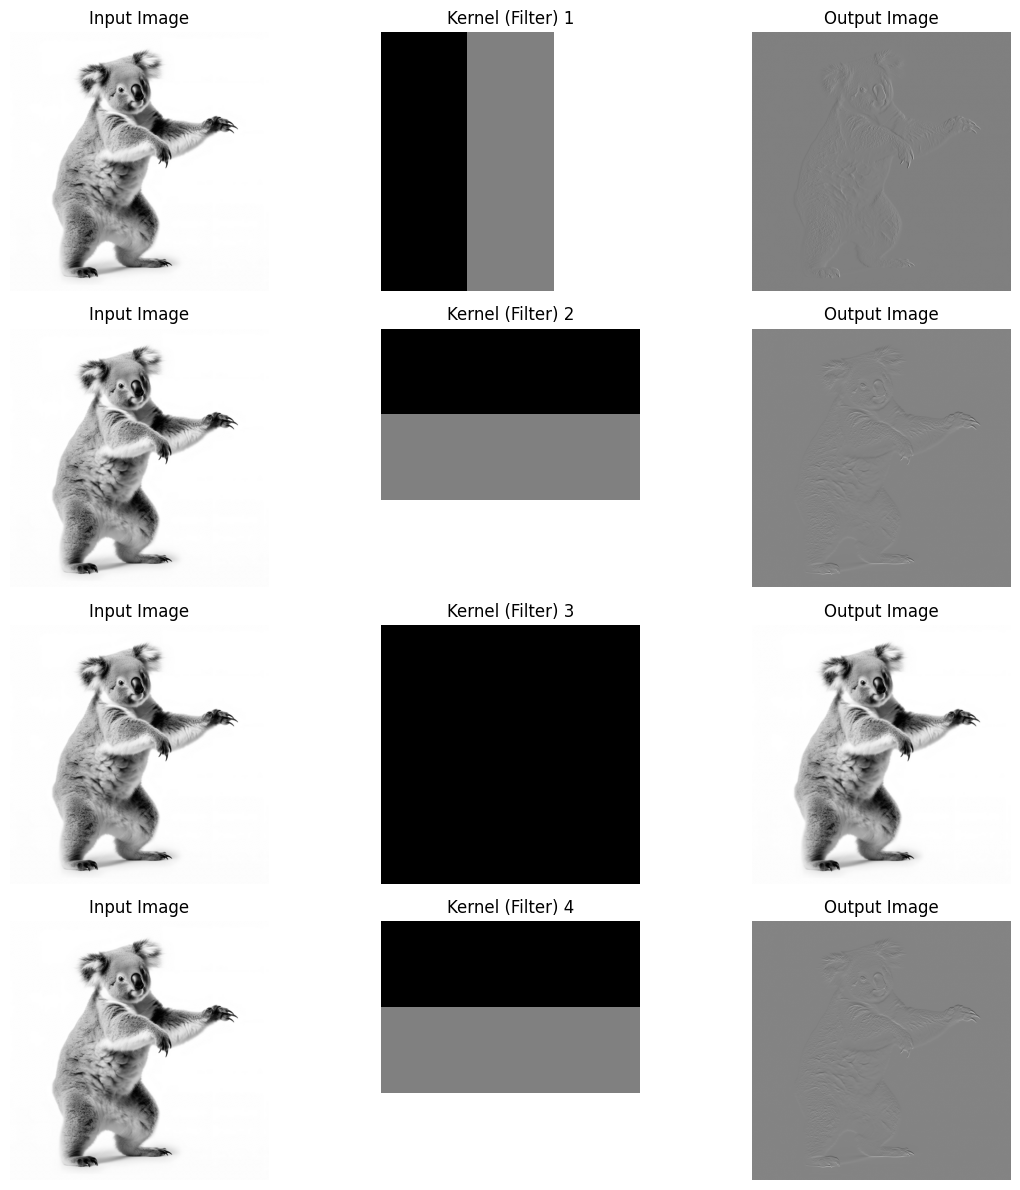

In [15]:
# Plots
plt.figure(figsize=(12, 12))

# conv1
plt.subplot(4, 3, 1)
plt.title("Input Image")
plt.imshow(input_image, cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 2)
plt.title("Kernel (Filter) 1")
plt.imshow(conv1.weight[0, 0].detach().numpy(), cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 3)
plt.title("Output Image")
plt.imshow(out1[0, 0].detach().numpy(), cmap='gray')
plt.axis('off')


# conv2
plt.subplot(4, 3, 4)
plt.title("Input Image")
plt.imshow(input_image, cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 5)
plt.title("Kernel (Filter) 2")
plt.imshow(conv2.weight[0, 0].detach().numpy(), cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 6)
plt.title("Output Image")
plt.imshow(out2[0, 0].detach().numpy(), cmap='gray')
plt.axis('off')


# conv3
plt.subplot(4, 3, 7)
plt.title("Input Image")
plt.imshow(input_image, cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 8)
plt.title("Kernel (Filter) 3")
plt.imshow(conv3.weight[0, 0].detach().numpy(), cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 9)
plt.title("Output Image")
plt.imshow(out3[0, 0].detach().numpy(), cmap='gray')
plt.axis('off')


# conv4
plt.subplot(4, 3, 10)
plt.title("Input Image")
plt.imshow(input_image, cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 11)
plt.title("Kernel (Filter) 4")
plt.imshow(conv4.weight[0, 0].detach().numpy(), cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 12)
plt.title("Output Image")
plt.imshow(out4[0, 0].detach().numpy(), cmap='gray')
plt.axis('off')


plt.tight_layout()
plt.show()

